# Exercise 1

As discussed in Section 1, resizing and rescaling digital images are not trivial operations. There are many ways to resize an image, and one of them is Seam Carving.

The advantage of this method is the content awareness, which enables resizing images while preserving their visual and semantic features.

In this exercise you will:
1. Apply image processing operations as preliminares for later
2. Implement the "Column Vertical" version of Seam Carving (restricted to columns only)
3. Original Seam Carving as taught in lecture ([original Seam Carving paper](https://faculty.runi.ac.il/arik/scweb/imret/imret.pdf))
4. Compare the two methods in addition to bilinear scaling (no need to implement)


Instructions:
* The notebook is just for displaying your implementation, **do not change code in it**. Changing it might cause failiure of our grading unit tests. If you want to change minor things, make sure the original one still runs and dispay results.
* In `utils.py` we created a template to `SeamImage`,`ColumnSeamImage` and the `VerticalSeamImage` class which you will be implementing. Note that if a function does not raise a "NotImplemented exception, it is not mandatory to implement, it is just a suggestion.
* `SeamImage` class is the parent class of the second two. It implements the common functionalities both methods share (the class attributes may help you to manage the metadata of the algorithms).
* `SeamImage` takes an image path and:
    - Loads an RGB image of the original shape
    - Creates a weighted grayscale image and stores it
    - Defines and stores all the required metadata for the Seam Carving algorithm
 
* `ColumnSeamImage` inherits from `SeamImage`. Its purpose is to:
    - Apply Column Seam Carving algorithm (support vertical and horizontal)
    - Track removed seam and later be able to visualize them

* `VerticalSeamImage` also inherits for `SeamImage`. Its purpose is to:
    - Apply Vertical Seam Carving algorithm (support vertical and horizontal)
    - Track removed seam and later be able to visualize them

* Both methods should implement the **forward-looking** cost matrix $M$
* To get full credit, **you are expected to implement the following as efficient as possible**, and get similar runtime as we report below
* **Tip**: In order to apply changes from outsides modules into `ipynb` files, restarting the notebook is required. To provet this, we recommend you to copy here the code and later test in from outside
* When submitting, the notebook must run end to end without any exception raised
* Submission format: **ex01_STUDENT1-ID_STUDENT2-ID.zip** containing `Seam Carving Assignment.ipynb` (all cells executed from start to end) and your completed `utils.py`
* Feel free to ask questions on Piazza. We highly encourage you to answer questions!

 ---

Please run the following (install libs if needed) 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from PIL import Image
from numba import jit
from utils import SeamImage, ColumnSeamImage, VerticalSeamImage

plt.rcParams["figure.figsize"] = (10,5)


In [14]:
# img_path = "pinguins.jpg"
img_path = "sunset.jpg"

# helper functions
def read_image(img_path):
    return np.asarray(Image.open(img_path)).astype('float32')


def show_image(np_img, grayscale=False):
    fig, ax = plt.subplots()
    if not grayscale:
        ax.imshow(np_img)
    else:
        ax.imshow(np_img, cmap=plt.get_cmap('gray'))
    ax.axis("off")
    plt.show()

def init_plt_grid(nrow=1, ncols=1, figsize=(20,10), **kwargs):
    fig, ax = plt.subplots(nrow, ncols, figsize=figsize, facecolor='gray', **kwargs)
    font_size = dict(size=20)
    return ax, font_size


* * *

### 1. Imaplement SeamImage (20 points)

In [15]:
# TODO: Create a SeamImage instance
s_img = SeamImage(img_path)

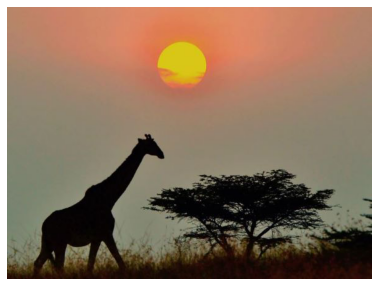

In [16]:
# display sample image we will be working on
show_image(s_img.rgb)

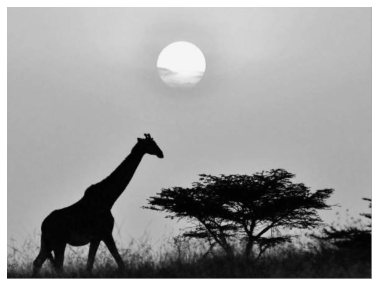

In [17]:
# disply grayscale version
show_image(s_img.gs, grayscale=True)

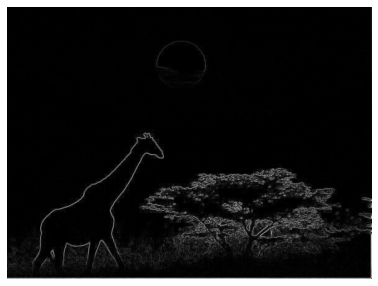

In [18]:
# display its energy (gradient magnitude)
show_image(s_img.E, grayscale=True)

### 2. Implement ColumnSeamImage class (30 points)

ColumnSeamImage stores an image, and applies Column Vertical Seam Carving. \
This also stores meta data such as: grayscale version, gradient magnitude map, boolean masks indicating if a seam removed or not, resized versions etc.
Note that also ColumnSeamImage should support horizontal seam carving, but a simple wrapper function should do the trick...


Guidlines:
* Implement the Energy matrix $M$ as guided
* `ColumnSeamImage.seams_removal_horizontal` and `ColumnSeamImage.seams_removal_horizontal` are wrappers to `ColumnSeamImage.seams_removal` which is the main method where all the megic happens. This process includes:
    * Gradient magnitude of each pixel of self.gs (= self.E)
    * Calculating pixel enrgry as taught, but with certain terms ommited (= self.M)
    * iterate for *num_remove* times d:
        * Find the minimal seam
        * Remove and update the actual seam from all metadata matruces
        * Update $E$ and $M$. *Note: you are requested to **update** and not recalculate them each time.*
* You are expected to report similiar runtime as our implementations

In [19]:
# TODO: Create a ColumnSeamImage instance
cs_img = ColumnSeamImage(img_path)

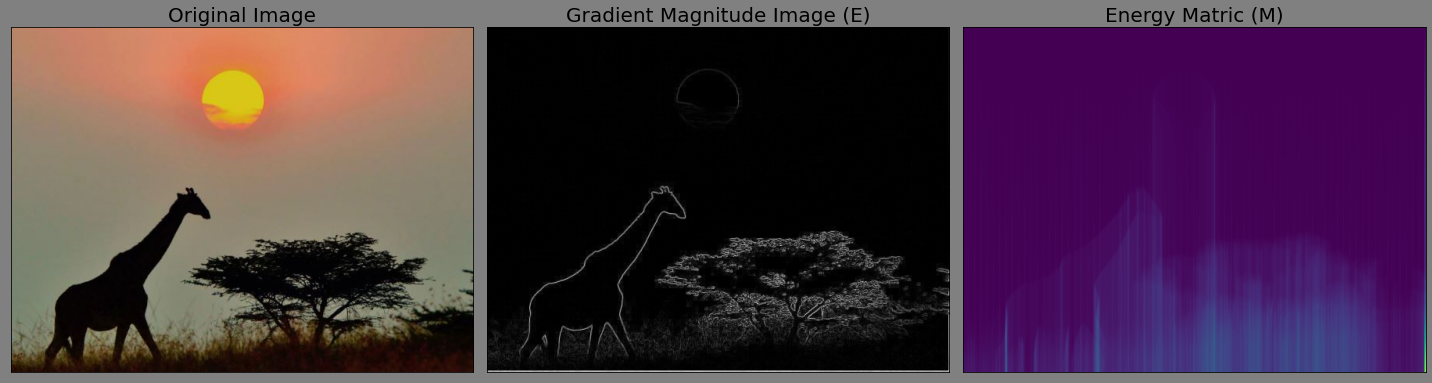

In [20]:
# dispay matrices

ax, font_size = init_plt_grid(ncols=3, figsize=(20,10))

ax[0].set_title('Original Image', **font_size)
ax[1].set_title('Gradient Magnitude Image (E)', **font_size)
ax[2].set_title('Energy Matric (M)', **font_size)

ax[0].imshow(cs_img.rgb)
ax[1].imshow(cs_img.E, cmap='gray')
ax[2].imshow(cs_img.M)

# dp_mat = vs_img.calc_dp_mat(vs_img.M.copy(), np.zeros_like(vs_img.M, dtype=int))
# ax[1,1].imshow(dp_mat)

for sp in ax.reshape(-1):
    sp.set_xticks([])
    sp.set_yticks([])

plt.tight_layout()


In [21]:
# remove seams (modify as you with)
%time cs_img.seams_removal_vertical(70)
%time cs_img.seams_removal_horizontal(110)

CPU times: total: 62.5 ms
Wall time: 47.3 ms
CPU times: total: 2.48 s
Wall time: 2.49 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


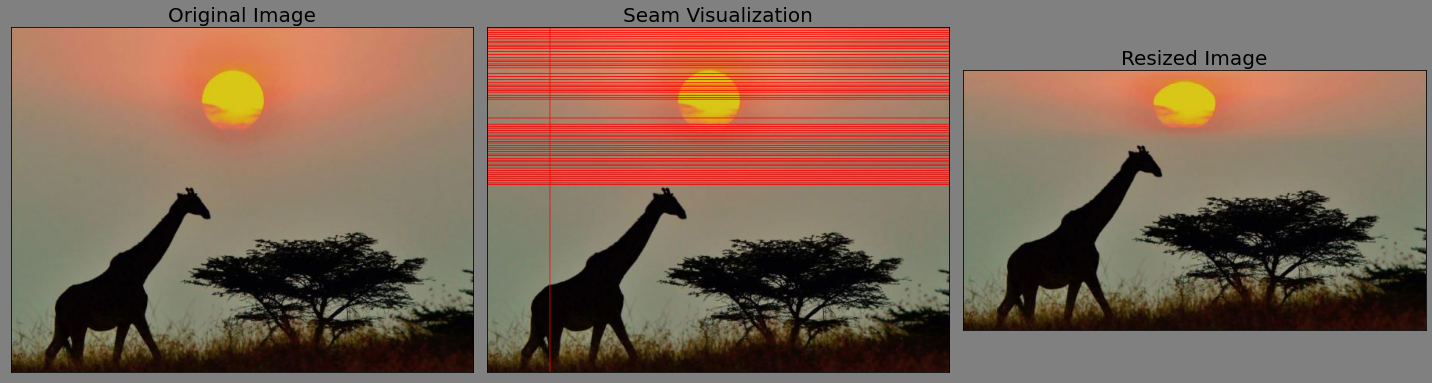

In [22]:
# display resulting images

ax, font_size = init_plt_grid(ncols=3, figsize=(20,10))

ax[0].set_title('Original Image', **font_size)
ax[1].set_title('Seam Visualization', **font_size)
ax[2].set_title('Resized Image', **font_size)

ax[0].imshow(cs_img.rgb)
ax[1].imshow(cs_img.seams_rgb)
ax[2].imshow(cs_img.resized_rgb)

# save resized version
Image.fromarray((cs_img.resized_rgb*255).astype('uint8')).save('./resized_rgb.jpg')

for sp in ax.reshape(-1):
    sp.set_xticks([])
    sp.set_yticks([])

plt.tight_layout()

### TODO: Implement VerticalSeamImage class (40 points)

VerticalSeamImage stores an image, and applies vertical Seam Carving. \
This also stores meta data such as: grayscale version, gradient magnitude map, boolean masks indicating if a seam is removed or not, resized versions etc.
Same as above, this class also should support horizontal seam carving.


Guidelines:
* Implement the Energy matrix $M$ as guided
* `VerticalSeamImage.seams_removal_horizontal` and `VerticalSeamImage.seams_removal_horizontal` are wrappers to `VerticalSeamImage.seams_removal` which is the main method where all the magic happens. This process includes:
    * Gradient magnitude of each pixel of self.gs (= self.E)
    * Calculating pixel energy as taught, but with certain terms omitted (= self.M)
    * iterate for *num_remove* times d:
        * Calculate $E$ and $M$ (self.E, self.M respectively)
        * Calculate the dynamic programming matrix
        * Find the minimal seam
        * Remove and update the seam from all metadata matrices
* You are expected to report similar runtime as our implementations
        
*Important: In order to get reasonable runtime, use the Numba decorator by uncommenting `@jit(nopython=True)` above `VerticalSeamImage.calc_dp_mat`*

In [23]:
# TODO: Create a VerticalSeamImage class
vs_img = VerticalSeamImage(img_path)

TODO: Implement SeamImage.calc_M


AttributeError: 'VerticalSeamImage' object has no attribute 'M'

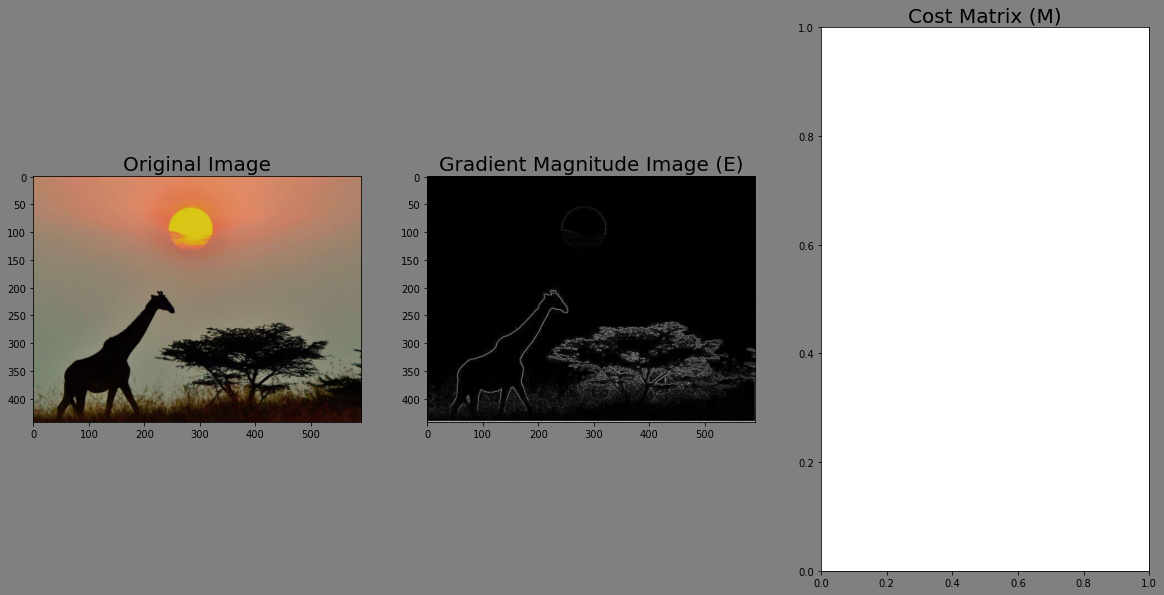

In [24]:
# dispay matrices

ax, font_size = init_plt_grid(ncols=3)

ax[0].set_title('Original Image', **font_size)
ax[1].set_title('Gradient Magnitude Image (E)', **font_size)
ax[2].set_title('Cost Matrix (M)', **font_size)

ax[0].imshow(vs_img.rgb)
ax[1].imshow(vs_img.E, cmap='gray')
ax[2].imshow(vs_img.M)

for sp in ax.reshape(-1):
    sp.set_xticks([])
    sp.set_yticks([])

plt.tight_layout()

In [ ]:
# remove seams (modify as you with)
%time vs_img.seams_removal_vertical(70)
%time vs_img.seams_removal_horizontal(110)

In [ ]:
# display resulting images

ax, font_size = init_plt_grid(ncols=3, figsize=(20,10))

ax[0].set_title('Original Image', **font_size)
ax[1].set_title('Seam Visualization', **font_size)
ax[2].set_title('Resized Image', **font_size)

ax[0].imshow(vs_img.rgb)
ax[1].imshow(vs_img.seams_rgb)
ax[2].imshow(vs_img.resized_rgb)

# save resized version
Image.fromarray((vs_img.resized_rgb*255).astype('uint8')).save('./resized_rgb.jpg')

for sp in ax.reshape(-1):
    sp.set_xticks([])
    sp.set_yticks([])

plt.tight_layout()

In [ ]:
# Resluts comparison

ax, font_size = init_plt_grid(2, 2, figsize=(12,12))

ax[0,0].set_title('SV-SC - Seams', **font_size)
ax[1,0].set_title('V-SC - Seams', **font_size)
ax[0,1].set_title('SV-SC - Resized', **font_size)
ax[1,1].set_title('V-SC - Resized', **font_size)

ax[0,0].imshow(cs_img.seams_rgb)
ax[1,0].imshow(vs_img.seams_rgb)
ax[0,1].imshow(cs_img.resized_rgb)
ax[1,1].imshow(vs_img.resized_rgb)

for sp in ax.reshape(-1):
    sp.set_xticks([])
    sp.set_yticks([])

plt.tight_layout()

#### Bonus: Enlarging images (8 points)
As discussed in the unit, seam's "importance" can be also used to enlarge images, simply duplicating the least important seam every time.

Implement `VerticalSeamImage.seams_addition`:
* You may use wrapper functions for vertical/horizontal (same as in the removal process)
* Paint the added seams in green
* To get full bonus credit, use the 'palawan.jpg' example and plot the visualization after: i) adding 50 vertical seams. ii) adding 50 horizontal seams

In [ ]:
vs_img.reinit()
try:
    vs_img.seams_addition_vertical(50)
except NotImplementedError as e:
    print(e)
try:
    vs_img.seams_addition_horizontal(50)
except NotImplementedError as e:
    print(e)

### Method Comparison and Recaling (10 points)

In this final section you will be comparing the two methods with bilinear interpolation (a rescaling algorithm, implemented for you).

In [ ]:
from utils import bilinear

In [ ]:
img_path = 'palawan2.jpg'

img = read_image(img_path)
scale_factors = [[.6, 1.], [1., .6]] # -> scale_factors[i,0] for height and scale_factors[i,1] for width
show_image(img.astype('int'));

In [ ]:
aspect_ratio = img.shape[1] / img.shape[0] # -> claculate the image AR
print('Aspect ratio:', aspect_ratio)

#### TODO: Implement `scale_to_shape` and `resize_seam_carving` (5 + 5 points)
* `scale_to_shape` takes an image shape (y,x) and $f_y,f_x$ scale factors and returns the new image shape.
* `resize_seam_carving` takes a SeamImage instance along with the new shape and applies the resize.

In [ ]:
from utils import scale_to_shape, resize_seam_carving

In [ ]:
data = {}
cs_img = ColumnSeamImage(img_path)
vs_img = VerticalSeamImage(img_path)

for s in scale_factors:
    orig_shape = np.asarray(img.shape[:-1])
    new_shape = scale_to_shape(orig_shape, s)
    bi_resized_rgb = bilinear(img, new_shape)
    cs_resized_rgb = resize_seam_carving(cs_img, (orig_shape, new_shape))
    vs_resized_rgb = resize_seam_carving(vs_img, (orig_shape, new_shape))
    data[str(s)] = (bi_resized_rgb, cs_resized_rgb, vs_resized_rgb)

In [ ]:
# Resluts comparison

ax, font_size = init_plt_grid(4, 2, figsize=(20,15))


ax[0,0].set_title(f'Scale Factor {scale_factors[0]}', **font_size)
ax[0,1].set_title(f'Scale Factor {scale_factors[1]}', **font_size)

ax[0,0].set_ylabel('Original', **font_size)
ax[1,0].set_ylabel('Bilinear Interp.', **font_size)
ax[2,0].set_ylabel('C-SC', **font_size)
ax[3,0].set_ylabel('V-SC', **font_size)


ax[0,0].imshow(img.astype('uint'))
ax[1,0].imshow(data[str(scale_factors[0])][0])
ax[2,0].imshow(data[str(scale_factors[0])][1])
ax[3,0].imshow(data[str(scale_factors[0])][2])

ax[0,1].imshow(img.astype('uint'))
ax[1,1].imshow(data[str(scale_factors[1])][0])
ax[2,1].imshow(data[str(scale_factors[1])][1])
ax[3,1].imshow(data[str(scale_factors[1])][2])


for sp in ax.reshape(-1):
    sp.set_xticks([])
    sp.set_yticks([])

plt.tight_layout()


### Discussion and Conclution

##### Discussion
* DP matrices: pay attention to the DP matrices you calculated. They should be give an intuition of the correcness of your implemetions.
* Seam Visualization: There are two noticible phenomanons when looking at them: i) Some seams might not be complete (side to side). Why is it? which of the seams is it likely to occur? ii) The chosen seams tend to avoid "important" content (look at the dices, the class etc,. Is it a positive characteristic?
* Rescaling and resizing: It can bee seen that Resizing images preserves geometry of objects, which emphisizes the adavantages of the conext-awareness of Seam Carving. On the other hand, rescaling modifies existing image pixels and thus might affect its content.

##### Conclution
* We have implemented two versions of the Seam Carving algorithms
* We have comared the two and discussed their down/up sides
* This implementation can be extended into some possible directions:
    * Enlarging images
    * Remove certain object as the user desires
    
<!-- *Spoiler*: The image you were working with in this assigment is **not real**. It has been rendered by a graphics engine using an algorithm named **Ray Tracing**. The will be discussed later in the course. -->

**Good Luck!**
